<a href="https://colab.research.google.com/github/Durgasankar-99/EMPLOYEE-BURNOUT-ANALYSIS-AND-PREDICTION/blob/main/Employee_burnout_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Dataset

In [ ]:
pd.set_option('display.max_columns', None)
burnoutDf=pd.read_csv('/content/drive/MyDrive/burnout. csv')
burnoutDf

Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No          2.0                  3.0   
1                     Yes          1.0                  2.0   
2                     Yes          2.0                  NaN   
3                     Yes          1.0                  1.0   
4                      No          3.0                  7.0   
...                   ...          ...                  ...   
22745                  No          1.0                  3.0   
22746                 Yes          3.0                  6.0   
22747                 Yes          3.0                  7.0   
22748                  No          2.0                  5.0   
22749                  No          3.0                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[22750 rows x 9 columns]

In [ ]:
# convert into dateTime dataType
burnoutDf["Date of Joining"]= pd.to_datetime(burnoutDf["Date of Joining"])

In [ ]:
# give the number of rows and columns
burnoutDf.shape

(22750, 9)

In [ ]:
# general information
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  float64       
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.6+ MB


In [ ]:
# show top 5 rows
burnoutDf.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No          2.0                  3.0                   3.8   
1                 Yes          1.0                  2.0                   5.0   
2                 Yes          2.0                  NaN                   5.8   
3                 Yes          1.0                  1.0                   2.6   
4                  No          3.0                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52

In [ ]:
# extract all columns of the dataset
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
#check for null values
burnoutDf.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
# check the duplicate values
burnoutDf.duplicated().sum()

0

In [ ]:
# calculate the mean , std, min, max and count of every attributes
burnoutDf.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

In [ ]:
# show the unique values
for i, col in enumerate(burnoutDf.columns):
  print(f"\n\n{burnoutDf[col].unique()}")
  print(f"\n{burnoutDf[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [ ]:
# Drop irrelevant column
burnoutDf=burnoutDf.drop(['Employee ID'],axis=1)

In [ ]:
# check the skewness of the attributes
intFloatburnoutDf=burnoutDf.select_dtypes([np.int, np.float])
for i, col in enumerate(intFloatburnoutDf.columns):
  if (intFloatburnoutDf[col].skew() >= 0.1):
    print("\n",col, "feature is Positively Skewed and value is: ", intFloatburnoutDf[col].skew())
  elif (intFloatburnoutDf[col].skew() <= -0.1):
      print("\n",col, "feature is Negatively Skewed and value is: ", intFloatburnoutDf[col].skew())
  else:
        print("\n",col, "feature is Normally Distributed and value is: ", intFloatburnoutDf[col].skew())


 Designation feature is Normally Distributed and value is:  0.09242138478903683

 Resource Allocation feature is Positively Skewed and value is:  0.20457273454318103

 Mental Fatigue Score feature is Negatively Skewed and value is:  -0.4308950578815428

 Burn Rate feature is Normally Distributed and value is:  0.045737370909640515


In [ ]:
# Replace the null values with mean
burnoutDf['Resource Allocation'].fillna(burnoutDf['Resource Allocation'].mean(),inplace=True)
burnoutDf['Mental Fatigue Score'].fillna(burnoutDf['Mental Fatigue Score'].mean(),inplace=True)
burnoutDf['Burn Rate'].fillna(burnoutDf['Burn Rate'].mean(),inplace=True)

In [ ]:
# check for null values
burnoutDf.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
# show the correlation
burnoutDf.corr()

Designation  Resource Allocation  Mental Fatigue Score  \
Designation              1.000000             0.852046              0.656445   
Resource Allocation      0.852046             1.000000              0.739268   
Mental Fatigue Score     0.656445             0.739268              1.000000   
Burn Rate                0.719284             0.811062              0.878217   

                      Burn Rate  
Designation            0.719284  
Resource Allocation    0.811062  
Mental Fatigue Score   0.878217  
Burn Rate              1.000000

Data Visualization

In [ ]:
# Plotting Heat map to check correlation
corr=burnoutDf.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig = px.imshow(corr, text_auto=True, aspect="auto")
fig.show()

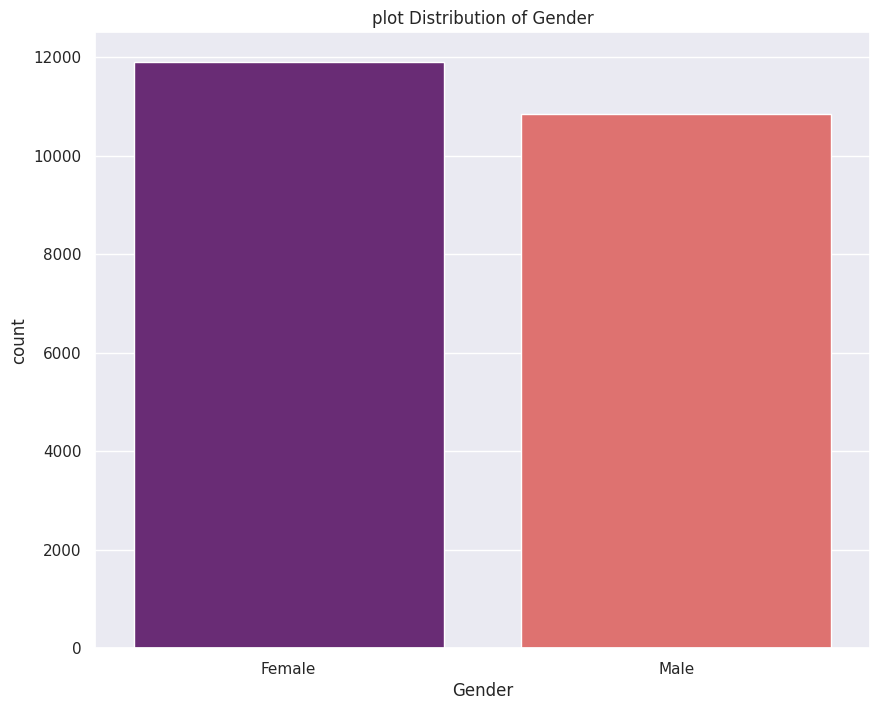

In [ ]:
# Count plot Distribution of "Gender"
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data=burnoutDf, palette="magma")
plt.title("plot Distribution of Gender")
plt.show()

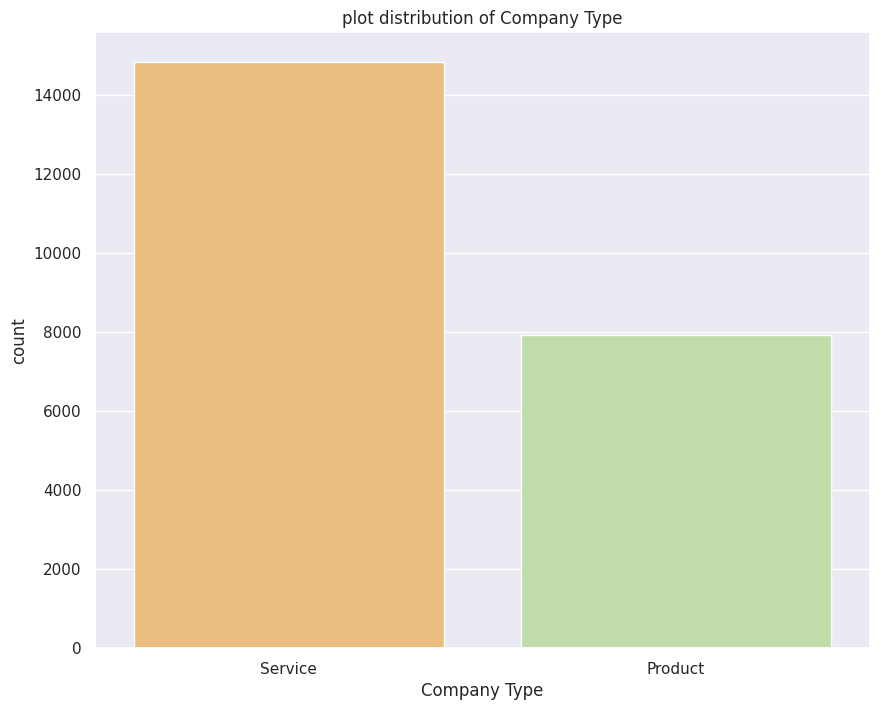

In [ ]:
# Count plot distribution of "Company Type"
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=burnoutDf, palette="Spectral")
plt.title("plot distribution of Company Type")
plt.show()

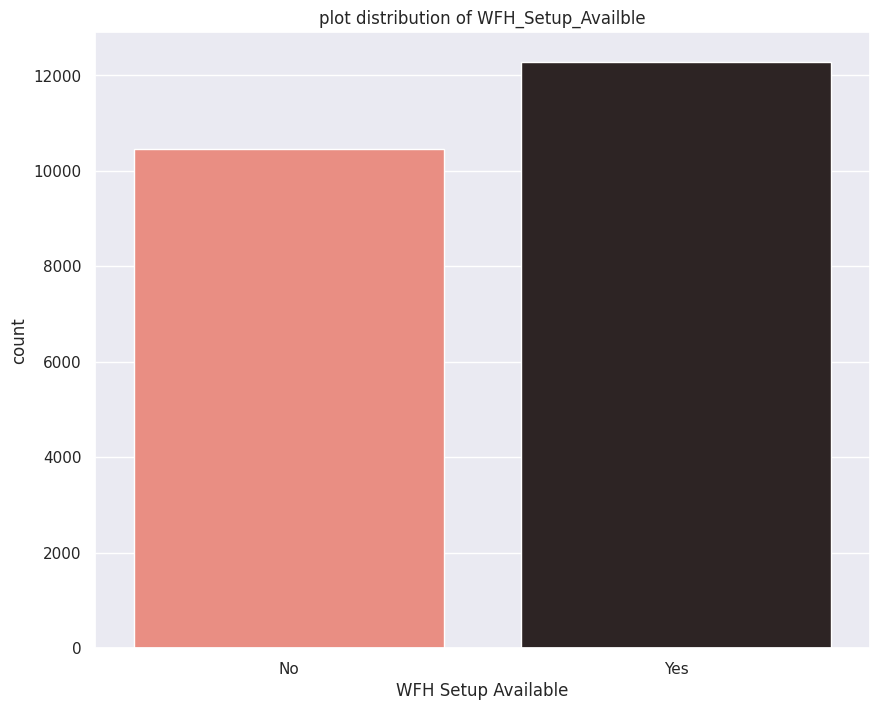

In [ ]:
# Count plot distribution of "WFH Setup Available"
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available", data=burnoutDf, palette="dark:salmon_r")
plt.title("plot distribution of WFH_Setup_Availble")
plt.show()

In [ ]:
# Count-plot diaatribution of attributes with the help of Histogram
burn_st=burnoutDf.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int, float])
for i, col in enumerate(burn_st.columns):
    fig = px.histogram(burn_st, x=col, title="Plot Distribution of "+col, color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.2)
    fig.show()

In [ ]:
# Plot distribution of Burn rate on the basis of Designation
fig = px.line(burnoutDf, y="Burn Rate", color="Designation", title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Plot distribution of Burn Rate on the basis of Gender
fig = px.line(burnoutDf, y="Burn Rate", color="Gender", title="Burn Rate on the basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
# Plot distribution of mental fatigue score on the basis of Designation
fig = px.line(burnoutDf, y="Mental Fatigue Score", color="Designation", title="Mental Fatigue vs Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

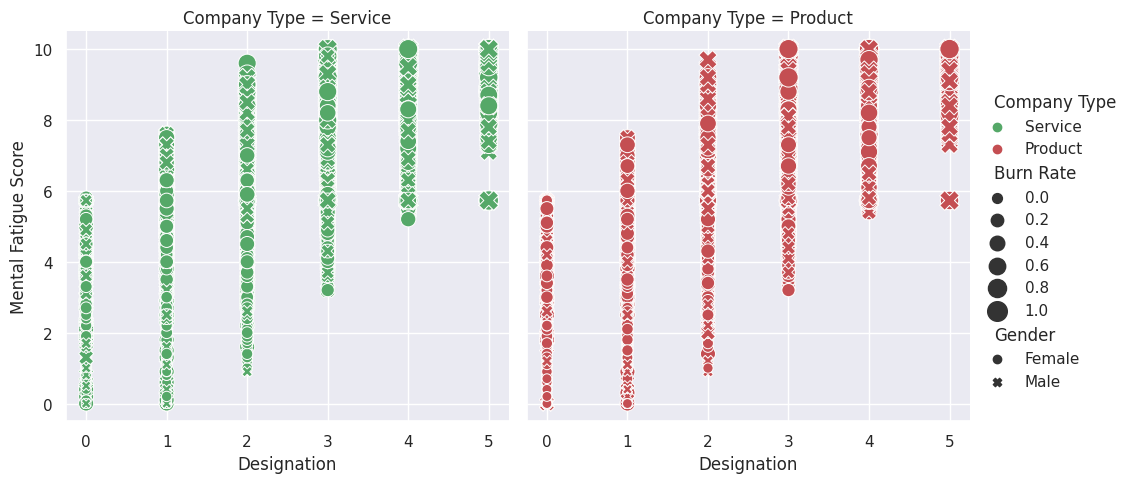

In [ ]:
# plot distribution of "Designation vs mental fatigue"as per Company type , Burn rate and Gender
sns.relplot(
    data=burnoutDf, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g", "r"], sizes=(50, 200)
)

Label Encoding

In [ ]:
# label encoding and assign in new variable
from sklearn import preprocessing
Lable_encode = preprocessing.LabelEncoder()

In [ ]:
# assign in new variable
burnoutDf['GenderLable'] = Lable_encode.fit_transform(burnoutDf['Gender'].values)
burnoutDf['Company_TypeLable'] = Lable_encode.fit_transform(burnoutDf['Company Type'].values)
burnoutDf['WFH_Setup_AvailableLable'] = Lable_encode.fit_transform(burnoutDf['WFH Setup Available'].values)

In [ ]:
# check assigned values
gn = burnoutDf.groupby('Gender')
gn = gn['GenderLable']
gn.first()

Gender
Female    0
Male      1
Name: GenderLable, dtype: int64

In [ ]:
# check assigned values
ct = burnoutDf.groupby('Company Type')
ct = ct['Compant_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Compant_TypeLabel, dtype: int64

In [ ]:
# check assigned values
wsa = burnoutDf.groupby('WFH Setup Available')
wsa = wsa['WFH_Setup_AvailableLable']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLable, dtype: int64

In [ ]:
# show last 10 rows
burnoutDf.tail(10)

Date of Joining  Gender Company Type WFH Setup Available  Designation  \
22740      2008-09-05  Female      Product                  No          3.0   
22741      2008-01-07    Male      Product                  No          2.0   
22742      2008-07-28    Male      Product                  No          3.0   
22743      2008-12-15  Female      Product                 Yes          1.0   
22744      2008-05-27    Male      Product                  No          3.0   
22745      2008-12-30  Female      Service                  No          1.0   
22746      2008-01-19  Female      Product                 Yes          3.0   
22747      2008-11-05    Male      Service                 Yes          3.0   
22748      2008-01-10  Female      Service                  No          2.0   
22749      2008-01-06    Male      Product                  No          3.0   

       Resource Allocation  Mental Fatigue Score  Burn Rate  GenderLable  \
22740                  6.0              7.300000   0.550000            0   
22741                  5.0              6.000000   0.452005            1   
22742                  5.0              8.100000   0.690000            1   
22743                  3.0              6.000000   0.480000            0   
22744                  7.0              6.200000   0.540000            1   
22745                  3.0              5.728188   0.410000            0   
22746                  6.0              6.700000   0.590000            0   
22747                  7.0              5.728188   0.720000            1   
22748                  5.0              5.900000   0.520000            0   
22749                  6.0              7.800000   0.610000            1   

       Compant_TypeLable  GenderLabel  Compant_TypeLabel  Company_TypeLable  \
22740                  0            0                  0                  0   
22741                  0            1                  0                  0   
22742                  0            1                  0                  0   
22743                  0            0                  0                  0   
22744                  0            1                  0                  0   
22745                  1            0                  1                  1   
22746                  0            0                  0                  0   
22747                  1            1                  1                  1   
22748                  1            0                  1                  1   
22749                  0            1                  0                  0   

       WFH_Setup_AvailableLable  
22740                         0  
22741                         0  
22742                         0  
22743                         1  
22744                         0  
22745                         0  
22746                         1  
22747                         1  
22748                         0  
22749                         0

Feature Selection

In [ ]:
# feature selection
columns=['Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'GenderLable', 'Company_TypeLable', 'WFH_Setup_Available']
x=burnoutDf[columns]
y=burnoutDf['Burn Rate']

In [ ]:

print(x)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLable  \
0              2.0             3.000000              3.800000            0   
1              1.0             2.000000              5.000000            1   
2              2.0             4.481398              5.800000            0   
3              1.0             1.000000              2.600000            1   
4              3.0             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745          1.0             3.000000              5.728188            0   
22746          3.0             6.000000              6.700000            0   
22747          3.0             7.000000              5.728188            1   
22748          2.0             5.000000              5.900000            0   
22749          3.0             6.000000              7.800000            1   

       Company_TypeLable  
0                      1  
1        

In [ ]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


Implementing PCA

In [ ]:
# principle component analysis
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print("PCA shaoe of x is: ",x_pca.shape, "and original shape is: ", x.shape)
print("% of importance of selected features is:", pca.explained_variance_ratio_)
print("The number of features selected through PCA is:", pca.n_components_)

PCA shaoe of x is:  (22750, 4) and original shape is:  (22750, 5)
% of importance of selected features is: [0.80288084 0.11418113 0.03102338 0.0268774 ]
The number of features selected through PCA is: 4


Data Splitting

In [ ]:
# Data Splitting in train and test
from sklearn.model_selection import train_test_split
x_train_pca, x_test, v_train, v_test = train_test_split(x_pca,y, test_size = 0.25, random_state=10)

In [ ]:
# print the shape of splitted data
print(x_train_pca.shape, x_test.shape, v_train.shape, v_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


MODEL IMPLEMENTATION

Random Forest Regressor

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train_pca, v_train)

train_pred_rf = rf_model.predict(x_train_pca)
train_r2 = r2_score(v_train, train_pred_rf)
test_pred_rf = rf_model.predict(x_test)
test_r2 = r2_score(v_test, test_pred_rf)
# Accuracy score
print("Accuracy score of train data: "+str(round(100*train_r2, 4))+" %")
print("Accuracy score of the test data: "+str(round(100*test_r2, 4))+" %")

Accuracy score of train data: 89.7017 %
Accuracy score of the test data: 84.4071 %


AdaBoost Regressor

In [ ]:
# AdaBoost regressor
from sklearn.ensemble import AdaBoostRegressor
abr_model = AdaBoostRegressor()
abr_model.fit(x_train_pca, v_train)

train_pred_adboost = abr_model.predict(x_train_pca)
train_r2 = r2_score(v_train, train_pred_adboost)
test_pred_adaboost = abr_model.predict(x_test)
test_r2 = r2_score(v_test, test_pred_adaboost)

# Accuracy score
print("Accuracy score of train data: "+str(round(100*train_r2, 4))+" %")
print("Accuracy score of the test data: "+str(round(100*test_r2, 4))+" %")

Accuracy score of train data: 77.6054 %
Accuracy score of the test data: 77.2549 %


BURNOUT PREDICTION

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor

import warnings
warnings.filterwarnings(action='ignore')



In [ ]:
burnoutDf=pd.read_csv('/content/drive/MyDrive/burnout. csv')

In [ ]:
burnoutDf

Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No          2.0                  3.0   
1                     Yes          1.0                  2.0   
2                     Yes          2.0                  NaN   
3                     Yes          1.0                  1.0   
4                      No          3.0                  7.0   
...                   ...          ...                  ...   
22745                  No          1.0                  3.0   
22746                 Yes          3.0                  6.0   
22747                 Yes          3.0                  7.0   
22748                  No          2.0                  5.0   
22749                  No          3.0                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[22750 rows x 9 columns]

In [ ]:
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [ ]:
def preprocess_inputs(df):
    df = df.copy()

    # Drop Employee ID column
    df = df.drop('Employee ID', axis=1)

    # Drop rows with missing target values
    missing_target_rows = df.loc[df['Burn Rate'].isna(), :].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

    # Fill remaining missing values with column means
    for column in ['Resource Allocation', 'Mental Fatigue Score']:
        df[column] = df[column].fillna(df[column].mean())

    # Extract date features
    df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
    df['Join Month'] = df['Date of Joining'].apply(lambda x: x.month)
    df['Join Day'] = df['Date of Joining'].apply(lambda x: x.day)
    df = df.drop('Date of Joining', axis=1)

    # Binary encoding
    df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
    df['Company Type'] = df['Company Type'].replace({'Product': 0, 'Service': 1})
    df['WFH Setup Available'] = df['WFH Setup Available'].replace({'No': 0, 'Yes': 1})

    # Split df into X and y
    y = df['Burn Rate']
    X = df.drop('Burn Rate', axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(burnoutDf)

In [ ]:
X_train

Gender  Company Type  WFH Setup Available  Designation  \
8275  -0.954022     -1.379211            -1.087295     0.725025   
21284  1.048194      0.725052            -1.087295     1.604608   
16802  1.048194      0.725052            -1.087295    -0.154557   
3271   1.048194     -1.379211            -1.087295     1.604608   
5302  -0.954022     -1.379211            -1.087295    -0.154557   
...         ...           ...                  ...          ...   
10955 -0.954022      0.725052            -1.087295    -0.154557   
17289 -0.954022      0.725052             0.919713     0.725025   
5192  -0.954022      0.725052             0.919713     0.725025   
12172  1.048194     -1.379211             0.919713    -1.913723   
235   -0.954022      0.725052            -1.087295    -1.913723   

       Resource Allocation  Mental Fatigue Score  Join Month  Join Day  
8275              0.768001              0.475128    0.433442 -0.649693  
21284             1.270205              1.131455    1.596251 -0.536187  
16802             0.768001              0.420434    1.305549  0.371860  
3271              2.274612              1.733089    0.142739  1.620424  
5302             -0.236406              0.475128    0.724144 -0.422682  
...                    ...                   ...         ...       ...  
10955             0.768001              0.803292   -1.020070 -1.444234  
17289            -0.236406             -0.509363   -0.147963  0.712377  
5192              0.265797             -1.165690    1.014847  0.031342  
12172            -1.743017             -1.220384    0.433442 -1.671246  
235              -1.743017             -2.861202   -0.729368  0.031342  

[15138 rows x 8 columns]

In [ ]:
y_train

8275     0.61
21284    0.81
16802    0.62
3271     0.73
5302     0.43
         ... 
10955    0.58
17289    0.39
5192     0.24
12172    0.18
235      0.00
Name: Burn Rate, Length: 15138, dtype: float64

In [ ]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                               XGBoost": XGBRegressor(),
    "                              LightGBM": LGBMRegressor(),
    "                             model_ABR":AdaBoostRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.
                             model_ABR trained.


In [ ]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression R^2 Score: 0.87075
 Linear Regression (L2 Regularization) R^2 Score: 0.87075
 Linear Regression (L1 Regularization) R^2 Score: -0.00001
                   K-Nearest Neighbors R^2 Score: 0.85603
                        Neural Network R^2 Score: 0.86741
Support Vector Machine (Linear Kernel) R^2 Score: 0.86868
   Support Vector Machine (RBF Kernel) R^2 Score: 0.88430
                         Decision Tree R^2 Score: 0.81875
                         Random Forest R^2 Score: 0.89762
                     Gradient Boosting R^2 Score: 0.90257
                               XGBoost R^2 Score: 0.90310
                              LightGBM R^2 Score: 0.90912
                             model_ABR R^2 Score: 0.81497
